# Support Vector Machines 

Support Vector Machines(SVM) is use to solve both linear and non-linear models. SVM is used for classification or regression problems. In addition, is a method that transform the data and figures the data transformations by finding optimal boundary between the outputs. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2018-01-01'
end = '2018-02-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700,0,1,1,0.051913
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000,0,1,0,0.049351
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900,0,0,1,-0.019802
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000,0,0,0,0.033670
2018-01-09,12.00,12.02,11.71,11.82,11.82,62560900,0,0,1,-0.037459


In [4]:
dataset['Target'] = 0
dataset.loc[dataset['Returns']>0, 'Target'] = 1
dataset.loc[dataset['Returns']<0, 'Target'] = -1

In [5]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns,Target
Date,,,,,,,,,,,
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700,0,1,1,0.051913,1
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000,0,1,0,0.049351,1
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900,0,0,1,-0.019802,-1
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000,0,0,0,0.033670,1
2018-01-09,12.00,12.02,11.71,11.82,11.82,62560900,0,0,1,-0.037459,-1


In [6]:
#split dataset in features and target variable
feature_cols = ['Adj Close']
X = dataset[feature_cols] # Features
Y = dataset.Target # Target variable

In [7]:
print(X.shape)
print(Y.shape)

(21, 1)
(21,)


In [8]:
X = np.array(X).reshape(21,-1)
Y = np.array(Y).reshape(21,-1)

In [9]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)

C:\Users\Tin Hang\Anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
print(X_train.shape)
print(y_train.shape)

(16, 1)
(16, 1)


In [11]:
from sklearn import svm

# instantiate the model (using the default parameters)
clf = svm.SVC(kernel='linear', gamma=1)

# fit the model with data
clf.fit(X, Y)

y_pred = clf.predict(Y)

In [12]:
clf.score(X, Y)

0.6190476190476191

In [13]:
#Predict Output
y_pred[0]

1

In [14]:
# date = np.reshape(dataset.index,(len(dataset.index),1))
date = np.array(dataset.index).reshape(21,-1)
price = np.array(dataset['Adj Close']).reshape(21,-1)

In [15]:
# Clheck for nan
np.isnan(price)

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [16]:
# date = date[~np.isnan(date)]
price = price[~np.isnan(price)]

In [25]:
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear',C=1e3)
svr_poly = SVR(kernel='poly',C=1e3,degree=1)
svr_rbf = SVR(kernel='rbf',C=1e3,gamma=0.1)
svr_sig = SVR(kernel='sigmoid', gamma=2)

svr_lin.fit(date,price)
svr_poly.fit(date,price)
svr_rbf.fit(date,price)
svr_sig.fit(date,price)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=2,
  kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

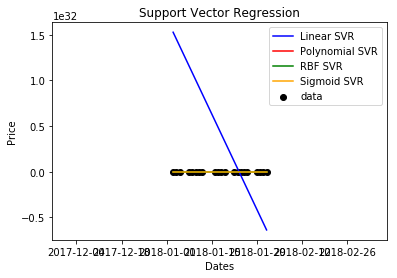

In [18]:
plt.scatter(date,price,color='black',label='data')
plt.plot(date,svr_lin.predict(date),color='blue',label='Linear SVR')
plt.plot(date,svr_poly.predict(date),color='red',label='Polynomial SVR')
plt.plot(date,svr_rbf.predict(date),color='green',label='RBF SVR')
plt.plot(date,svr_sig.predict(date),color='orange',label='Sigmoid SVR')
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [26]:
print('Linear SVR Score:', svr_lin.score(date,price))
print('Sigmoid SVR Score:', svr_sig.score(date,price))
print('RBF SVR Score:', svr_rbf.score(date,price))
print('Polynomial SVR Score:', svr_poly.score(date,price))

Linear SVR Score: -2.102116219409026e+64
Sigmoid SVR Score: -0.026407466753075592
RBF SVR Score: 0.9697482578074146
Polynomial SVR Score: -2.102116219409026e+64


In [24]:
print(svr_lin.predict(10)[0])
print(svr_poly.predict(10)[0])
print(svr_rbf.predict(10)[0])
print(svr_sig.predict(10)[0])

1.3104341848142826e+35
nan
12.47263157894737
12.375


In [39]:
from sklearn.svm import SVC

X = np.array(dataset[['Open', 'High']])
y = np.array(dataset['Buy_Sell'])
clf = SVC(gamma='auto')
clf.fit(X, Y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
def plotSVC(title):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))

    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

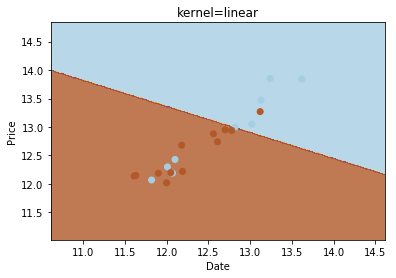

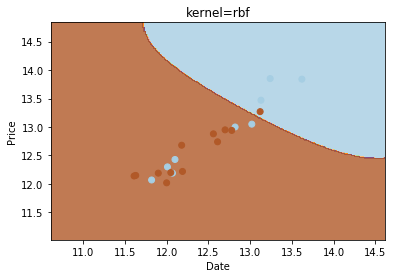

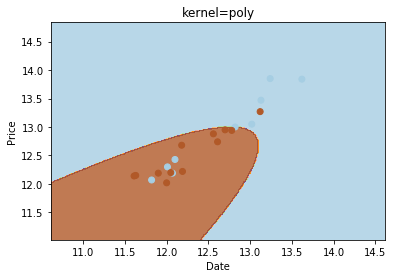

In [41]:
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
  svc = svm.SVC(kernel=kernel).fit(X, y)
  plotSVC('kernel=' + str(kernel))

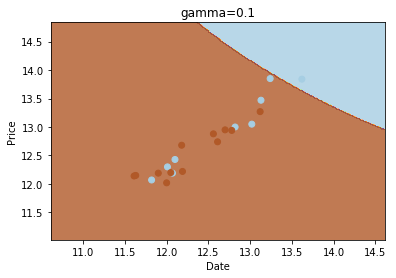

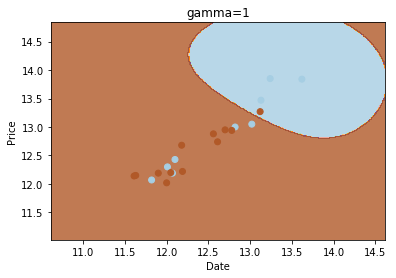

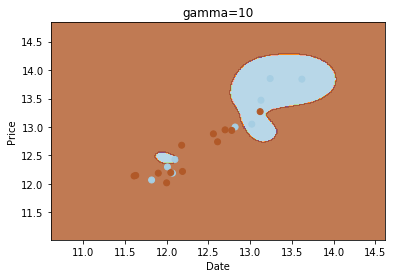

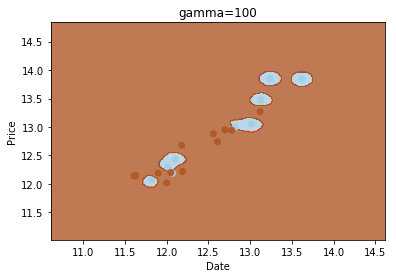

In [44]:
gammas = [0.1, 1, 10, 100]

for gamma in gammas:
   svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
   plotSVC('gamma=' + str(gamma))

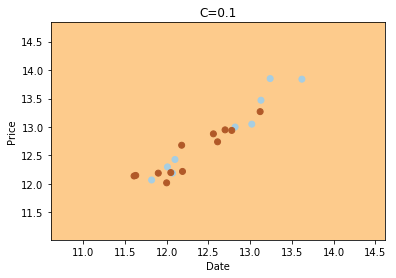

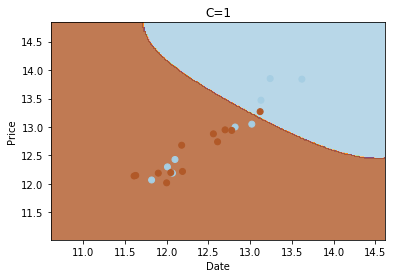

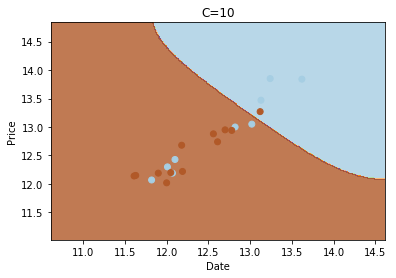

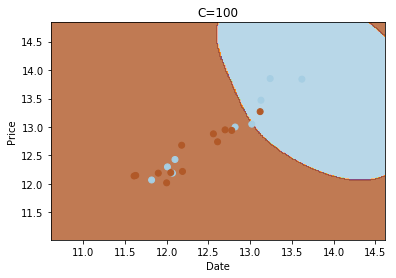

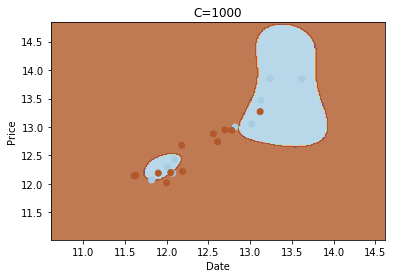

In [45]:
cs = [0.1, 1, 10, 100, 1000]

for c in cs:
   svc = svm.SVC(kernel='rbf', C=c).fit(X, y)
   plotSVC('C=' + str(c))

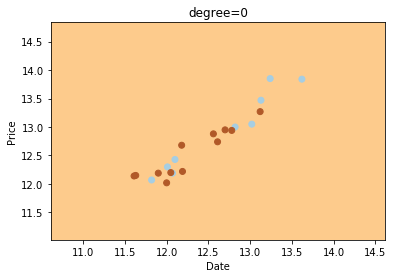

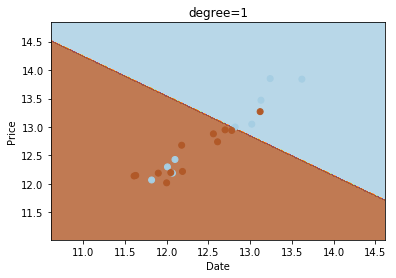

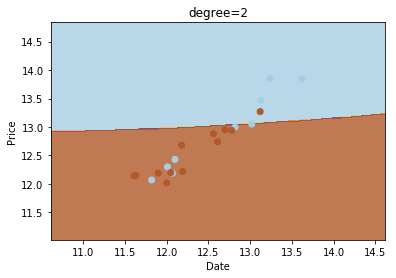

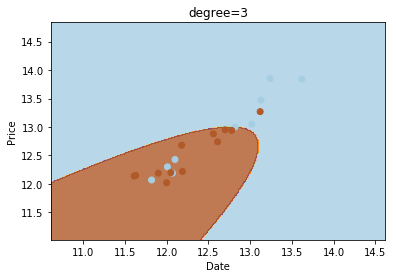

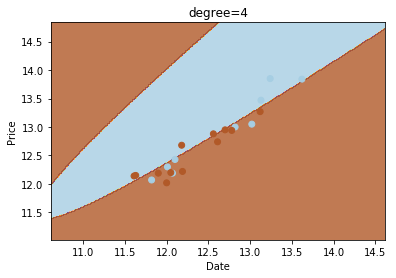

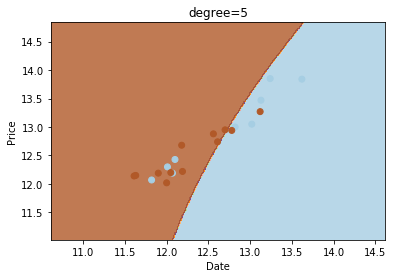

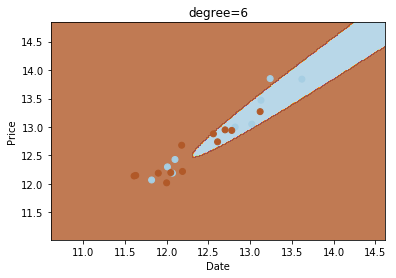

In [46]:
degrees = [0, 1, 2, 3, 4, 5, 6]

for degree in degrees:
   svc = svm.SVC(kernel='poly', degree=degree).fit(X, y)
   plotSVC('degree=' + str(degree))